In [1]:
import pandas
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# We load the data
df = pandas.read_csv("datasets/training_1.csv")
df.head()

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,06/01/14 00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
1,06/01/14 01,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2,06/01/14 02,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
3,06/01/14 03,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
4,06/01/14 04,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [3]:
# Let's drop the not interesting columns
df.drop(["DATETIME"],axis=1,inplace=True)
for column in df:
    if df[column].std() == 0:
        df.drop([column],axis=1,inplace=True)
df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,F_PU2,S_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,99.018150,1,...,26.426495,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471
1,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,99.115639,1,...,26.422962,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256
2,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,98.440498,1,...,26.427771,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538
3,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,97.594460,1,...,26.519985,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952
4,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,97.370277,1,...,26.671642,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263


In [4]:
# Normalization
df = (df-df.mean())/df.std()
df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,F_PU2,S_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,-1.801565,-0.842113,-1.489650,-1.437018,-0.125298,-0.302075,-2.099720,-0.191826,0.699668,0.607166,...,-0.488900,0.968419,-0.470904,0.195791,-1.257251,0.754404,-1.255119,-0.149595,-1.032066,-0.363334
1,-1.882325,-0.869302,-0.824294,-1.364678,0.514420,0.701111,-1.750172,-0.182128,0.701976,0.607166,...,-0.490189,1.186167,-0.473947,0.421498,-1.269105,0.771132,-1.266866,-0.139617,-1.039913,-0.375830
2,-1.959194,-0.884949,-0.090836,-0.577027,1.124100,0.730101,-1.274714,-0.249295,0.685992,0.607166,...,-0.488435,1.376168,-0.473933,0.512447,-1.099760,0.955404,-1.096286,0.846358,-1.039846,-0.375723
3,-1.948581,-0.869213,0.695183,0.326816,1.637971,0.730101,-0.119562,-0.333465,0.665963,0.607166,...,-0.454789,1.557952,-0.441418,0.704115,0.356578,-0.981372,0.351596,1.569827,-1.017304,-0.339829
4,-1.823373,-0.814845,1.527148,1.559008,1.028984,0.730101,1.371833,-0.355768,0.660656,0.607166,...,-0.399455,1.779975,-0.387143,1.024245,0.397674,-0.973739,0.392601,1.650352,-0.987935,-0.293062


L_T1 L_T2 -0.24185582069048747
L_T1 L_T3 -0.05106024947475682
L_T1 L_T4 -0.013559984007193776
L_T1 L_T5 -0.10682489062792513
L_T1 L_T6 -0.08829332510709101
L_T1 L_T7 0.010477143030460748
L_T1 F_PU1 0.038016300014057286
L_T1 F_PU2 -0.25926733018895076
L_T1 S_PU2 -0.23116315312090233
L_T1 F_PU4 -0.04528874590142676
L_T1 S_PU4 -0.03168852314390886
L_T1 F_PU6 -0.008489090512194255
L_T1 S_PU6 -0.008680517261571718
L_T1 F_PU7 0.024330928937004323
L_T1 S_PU7 0.03955634616472317
L_T1 F_PU8 0.00683221593768136
L_T1 S_PU8 -0.009138629611275626
L_T1 F_PU10 0.023854980248088607
L_T1 S_PU10 -0.002559451987218083
L_T1 F_PU11 -0.033237606022734956
L_T1 S_PU11 -0.03339735251058103
L_T1 F_V2 -0.3159244226910246
L_T1 S_V2 -0.46273609499387647
L_T1 P_J280 0.3309482332109816
L_T1 P_J269 -0.04003576116280926
L_T1 P_J300 -0.3331569031672189
L_T1 P_J256 -0.0873067932503227
L_T1 P_J289 -0.33678463613525744
L_T1 P_J415 -0.01476825387903342
L_T1 P_J302 0.2621317280532651
L_T1 P_J306 0.002898858481734127
L_T1 P_

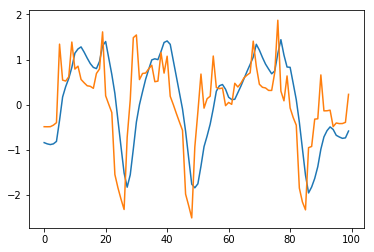

L_T2 P_J256 -0.24113300883195524
L_T2 P_J289 0.5947713172315869


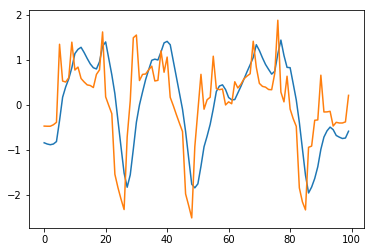

L_T2 P_J415 -0.08274667657379554
L_T2 P_J302 0.04407629295636118
L_T2 P_J306 0.021410318452113112
L_T2 P_J307 0.04436690857617801
L_T2 P_J317 -0.09707602806841266
L_T2 P_J14 0.27715667184876813
L_T2 P_J422 0.580138275389686


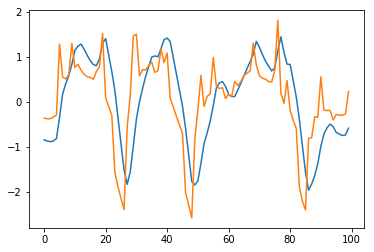

L_T3 L_T1 -0.05106024947475682
L_T3 L_T2 -0.2397590122952258
L_T3 L_T4 0.22142787346509293
L_T3 L_T5 0.07002718492728383
L_T3 L_T6 -0.06790261377755727
L_T3 L_T7 0.23931064964294788
L_T3 F_PU1 -0.09983976498606856
L_T3 F_PU2 0.08842899026514471
L_T3 S_PU2 0.09136308020965266
L_T3 F_PU4 -0.1559740555038876
L_T3 S_PU4 -0.14155003039725816
L_T3 F_PU6 -0.04945369339409661
L_T3 S_PU6 -0.04963997264188468
L_T3 F_PU7 -0.2526982979294074
L_T3 S_PU7 -0.2397104308891924
L_T3 F_PU8 -0.39125619262792743
L_T3 S_PU8 -0.38937611719494
L_T3 F_PU10 -0.2878152566931003
L_T3 S_PU10 -0.28459351950180883
L_T3 F_PU11 -0.004500001739606682
L_T3 S_PU11 -0.003959416814304453
L_T3 F_V2 0.36963159736125895
L_T3 S_V2 0.2979291407004122
L_T3 P_J280 -0.08113656951942663
L_T3 P_J269 0.09979420359341956
L_T3 P_J300 0.21105716956434747
L_T3 P_J256 0.06282301333861928
L_T3 P_J289 0.21091509173678444
L_T3 P_J415 -0.10793629176681696
L_T3 P_J302 0.4083017710228078
L_T3 P_J306 -0.32848673403033185
L_T3 P_J307 0.4091556964

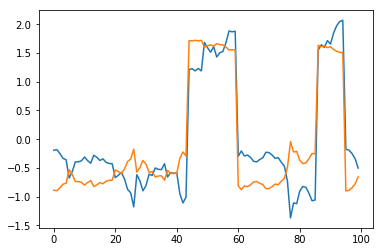

F_PU1 P_J269 -0.9999450056781356
F_PU1 P_J300 -0.21007924544405562
F_PU1 P_J256 -0.02097567318724871
F_PU1 P_J289 -0.21140107195812471
F_PU1 P_J415 0.05363286067701429
F_PU1 P_J302 -0.3163365709515868
F_PU1 P_J306 0.063369143057118
F_PU1 P_J307 -0.31585468332391714
F_PU1 P_J317 0.013232926045188305
F_PU1 P_J14 -0.4034232866224069
F_PU1 P_J422 -0.20735032749813065
F_PU2 L_T1 -0.25926733018895076
F_PU2 L_T2 0.40944846684581926
F_PU2 L_T3 0.08842899026514471
F_PU2 L_T4 0.003765540299407857
F_PU2 L_T5 0.049731102014327226
F_PU2 L_T6 -0.009499872433739976
F_PU2 L_T7 0.04130221465274266
F_PU2 F_PU1 -0.9490116662577729
F_PU2 S_PU2 0.9986139581288052


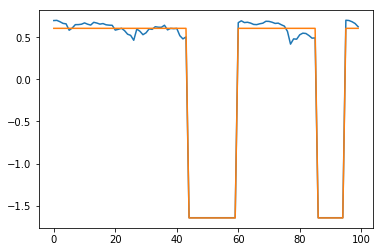

F_PU2 F_PU4 -0.005261093039051638
F_PU2 S_PU4 -0.01085213070248611
F_PU2 F_PU6 0.022183435781767444
F_PU2 S_PU6 0.022167198927901137
F_PU2 F_PU7 -0.058672044646231734
F_PU2 S_PU7 -0.06782363946570501
F_PU2 F_PU8 -0.0345228067754919
F_PU2 S_PU8 -0.03824873975114101
F_PU2 F_PU10 -0.06010411388905759
F_PU2 S_PU10 -0.060920617191295316
F_PU2 F_PU11 0.014419039734144604
F_PU2 S_PU11 0.014443155208161067
F_PU2 F_V2 0.10746600632161264
F_PU2 S_V2 0.0668448823745991
F_PU2 P_J280 -0.9933443369056989
F_PU2 P_J269 0.9503465995699882


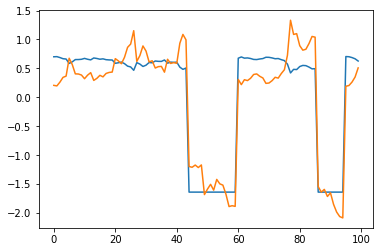

F_PU2 P_J300 0.31757292617194965
F_PU2 P_J256 0.051937638801028065
F_PU2 P_J289 0.3201982749110326
F_PU2 P_J415 -0.007540410609325708
F_PU2 P_J302 0.14205725690328844
F_PU2 P_J306 -0.00835268514442107
F_PU2 P_J307 0.14192823861660436
F_PU2 P_J317 0.026896728186002822
F_PU2 P_J14 0.13850082305827288
F_PU2 P_J422 0.33183338427581965
S_PU2 L_T1 -0.23116315312090233
S_PU2 L_T2 0.4102858629833625
S_PU2 L_T3 0.09136308020965266
S_PU2 L_T4 0.003195695816934917
S_PU2 L_T5 0.04746976094066816
S_PU2 L_T6 -0.019742378738259833
S_PU2 L_T7 0.045103175064091366
S_PU2 F_PU1 -0.9619861213680546
S_PU2 F_PU2 0.9986139581288052


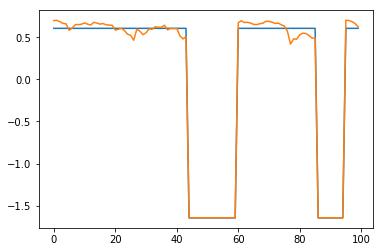

S_PU2 F_PU4 -0.01457044264000203
S_PU2 S_PU4 -0.019293842172100752
S_PU2 F_PU6 0.01996357442590895
S_PU2 S_PU6 0.019946339587347182
S_PU2 F_PU7 -0.06697490535345853
S_PU2 S_PU7 -0.07512598531899076
S_PU2 F_PU8 -0.04373603476332683
S_PU2 S_PU8 -0.04822510676592386
S_PU2 F_PU10 -0.06989125265005566
S_PU2 S_PU10 -0.07208689312452098
S_PU2 F_PU11 0.012945686166258028
S_PU2 S_PU11 0.012977301919447579
S_PU2 F_V2 0.0756514085154524
S_PU2 S_V2 0.03228907154796064
S_PU2 P_J280 -0.9862577404195718
S_PU2 P_J269 0.9628774143822518


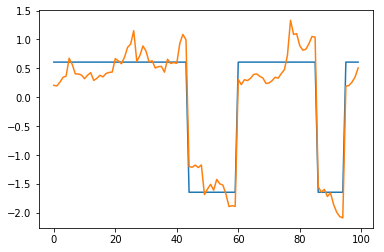

S_PU2 P_J300 0.3058905327391375
S_PU2 P_J256 0.04375054147375007
S_PU2 P_J289 0.30828935526018003
S_PU2 P_J415 -0.015115379145156791
S_PU2 P_J302 0.16722208546499925
S_PU2 P_J306 -0.016445730163197062
S_PU2 P_J307 0.1670544338177365
S_PU2 P_J317 0.019664193465923317
S_PU2 P_J14 0.1778793167436279
S_PU2 P_J422 0.3175340922514185
F_PU4 L_T1 -0.04528874590142676
F_PU4 L_T2 -0.23882439839833122
F_PU4 L_T3 -0.1559740555038876
F_PU4 L_T4 -0.1859034693180018
F_PU4 L_T5 0.26946490785186744
F_PU4 L_T6 0.27622363345576945
F_PU4 L_T7 -0.13914076411835827
F_PU4 F_PU1 0.042439323628176914
F_PU4 F_PU2 -0.005261093039051638
F_PU4 S_PU2 -0.01457044264000203
F_PU4 S_PU4 0.9986486512926873


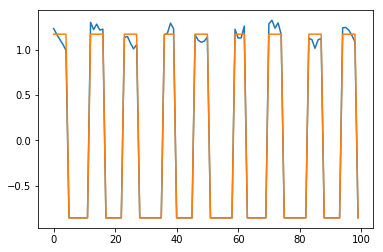

F_PU4 F_PU6 -0.015033184396407932
F_PU4 S_PU6 -0.014662687268552934
F_PU4 F_PU7 0.22675627803281254
F_PU4 S_PU7 0.24521766475773085
F_PU4 F_PU8 0.133438736306221
F_PU4 S_PU8 0.1418004480650514
F_PU4 F_PU10 0.22297421493716357
F_PU4 S_PU10 0.23330968328783977
F_PU4 F_PU11 0.02389618488988224
F_PU4 S_PU11 0.023920525755804698
F_PU4 F_V2 -0.011242825678686105
F_PU4 S_V2 -0.07398379418852512
F_PU4 P_J280 -0.011786211898236152
F_PU4 P_J269 -0.040809944621702274
F_PU4 P_J300 -0.5525098386053992
F_PU4 P_J256 0.9559029678343062


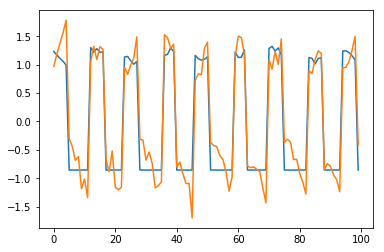

F_PU4 P_J289 -0.5389197626881156
F_PU4 P_J415 0.17024296276828838
F_PU4 P_J302 -0.21506591287322555
F_PU4 P_J306 0.13542477776676543
F_PU4 P_J307 -0.2161442176567773
F_PU4 P_J317 0.20381389194049443
F_PU4 P_J14 -0.07638591162534579
F_PU4 P_J422 -0.4896954326411424
S_PU4 L_T1 -0.03168852314390886
S_PU4 L_T2 -0.2606168649612524
S_PU4 L_T3 -0.14155003039725816
S_PU4 L_T4 -0.18668295907631932
S_PU4 L_T5 0.2730637178983547
S_PU4 L_T6 0.27817231899253414
S_PU4 L_T7 -0.1346481071013389
S_PU4 F_PU1 0.041135437065472215
S_PU4 F_PU2 -0.01085213070248611
S_PU4 S_PU2 -0.019293842172100752
S_PU4 F_PU4 0.9986486512926873


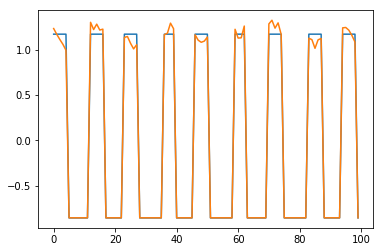

S_PU4 F_PU6 -0.015296852672645399
S_PU4 S_PU6 -0.01493268439749187
S_PU4 F_PU7 0.22746082988679087
S_PU4 S_PU7 0.24769232522228157
S_PU4 F_PU8 0.1284836302324787
S_PU4 S_PU8 0.13662249073418803
S_PU4 F_PU10 0.22086940665819146
S_PU4 S_PU10 0.2311253198959072
S_PU4 F_PU11 0.024929220701608964
S_PU4 S_PU11 0.024990102456255877
S_PU4 F_V2 -0.02529814952181881
S_PU4 S_V2 -0.09232213644556325
S_PU4 P_J280 -0.003931020570506172
S_PU4 P_J269 -0.039566260246364886
S_PU4 P_J300 -0.5761576105341278
S_PU4 P_J256 0.958924376142893


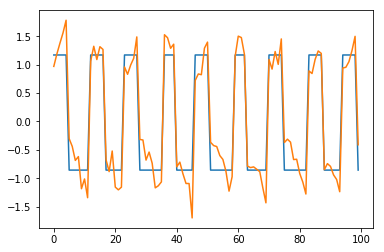

S_PU4 P_J289 -0.5628094970877382
S_PU4 P_J415 0.17268029668822693
S_PU4 P_J302 -0.20395579807526895
S_PU4 P_J306 0.1321876821841154
S_PU4 P_J307 -0.20507019648085748
S_PU4 P_J317 0.20920176908000407
S_PU4 P_J14 -0.06142244994090209
S_PU4 P_J422 -0.5147196289683478
F_PU6 L_T1 -0.008489090512194255
F_PU6 L_T2 -0.033032212102386174
F_PU6 L_T3 -0.04945369339409661
F_PU6 L_T4 -0.06749851791813379
F_PU6 L_T5 0.015829457334603086
F_PU6 L_T6 0.03101599155551284
F_PU6 L_T7 -0.033275684772269894
F_PU6 F_PU1 -0.008385681209380784
F_PU6 F_PU2 0.022183435781767444
F_PU6 S_PU2 0.01996357442590895
F_PU6 F_PU4 -0.015033184396407932
F_PU6 S_PU4 -0.015296852672645399
F_PU6 S_PU6 0.9998872057828723


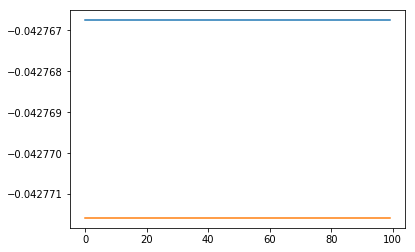

F_PU6 F_PU7 -0.01208225087075476
F_PU6 S_PU7 0.018246071201044423
F_PU6 F_PU8 0.02386014088963366
F_PU6 S_PU8 0.02446447601510699
F_PU6 F_PU10 0.019687010584403968
F_PU6 S_PU10 0.02050957081079175
F_PU6 F_PU11 -0.0009118514275670588
F_PU6 S_PU11 -0.0009140783369258412
F_PU6 F_V2 0.03902117578092745
F_PU6 S_V2 0.02606738769273552
F_PU6 P_J280 -0.026932561350697413
F_PU6 P_J269 0.008677546180295833
F_PU6 P_J300 -0.01563877255904728
F_PU6 P_J256 -0.024707817257132156
F_PU6 P_J289 -0.016804793049146647
F_PU6 P_J415 0.1259658066303126
F_PU6 P_J302 -0.03398178551747727
F_PU6 P_J306 0.021169472396138967
F_PU6 P_J307 -0.03399981829841513
F_PU6 P_J317 0.005601030847116436
F_PU6 P_J14 -0.04133050751392944
F_PU6 P_J422 -0.011061698266871945
S_PU6 L_T1 -0.008680517261571718
S_PU6 L_T2 -0.03301246986544205
S_PU6 L_T3 -0.04963997264188468
S_PU6 L_T4 -0.06726359961595053
S_PU6 L_T5 0.016086007034194497
S_PU6 L_T6 0.031023501478045657
S_PU6 L_T7 -0.03330753246195314
S_PU6 F_PU1 -0.00836039446062847
S_

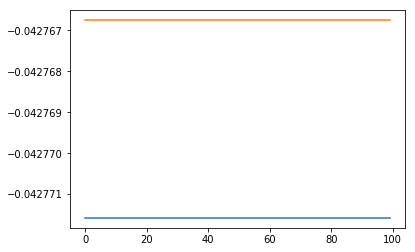

S_PU6 F_PU7 -0.012103432756283923
S_PU6 S_PU7 0.0182481294845237
S_PU6 F_PU8 0.023792595249203317
S_PU6 S_PU8 0.024404916005923323
S_PU6 F_PU10 0.019682105413043934
S_PU6 S_PU10 0.020511884432738145
S_PU6 F_PU11 -0.0009119542907373393
S_PU6 S_PU11 -0.0009141814513069548
S_PU6 F_V2 0.03901120476260376
S_PU6 S_V2 0.02607032827500359
S_PU6 P_J280 -0.026919827376232518
S_PU6 P_J269 0.008652109109870706
S_PU6 P_J300 -0.015690310963433617
S_PU6 P_J256 -0.024307488453966207
S_PU6 P_J289 -0.016849194327681373
S_PU6 P_J415 0.12602094290878324
S_PU6 P_J302 -0.03395384302386921
S_PU6 P_J306 0.02113329702981582
S_PU6 P_J307 -0.033971906317485034
S_PU6 P_J317 0.005681661133702634
S_PU6 P_J14 -0.04134836553206338
S_PU6 P_J422 -0.011083958308509835
F_PU7 L_T1 0.024330928937004323
F_PU7 L_T2 -0.09113728890885768
F_PU7 L_T3 -0.2526982979294074
F_PU7 L_T4 -0.21071633042877735
F_PU7 L_T5 0.018976555078556896
F_PU7 L_T6 0.14171318876224331
F_PU7 L_T7 -0.13880215261530773
F_PU7 F_PU1 0.10888919252226299
F_

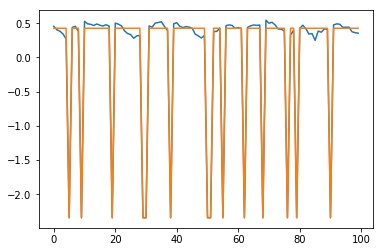

F_PU7 F_PU8 0.16896458589728455
F_PU7 S_PU8 0.17101924709081992
F_PU7 F_PU10 0.21870247455513767
F_PU7 S_PU10 0.22019020384607535
F_PU7 F_PU11 0.008397517276644787
F_PU7 S_PU11 0.008376332595352299
F_PU7 F_V2 0.013307214295393137
F_PU7 S_V2 -0.08141646109409652
F_PU7 P_J280 0.038249677292355906
F_PU7 P_J269 -0.10823507080394071
F_PU7 P_J300 -0.47559184490845835
F_PU7 P_J256 0.1277945929696712
F_PU7 P_J289 -0.48017052412018063
F_PU7 P_J415 0.9540431021378145


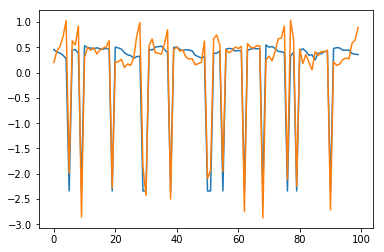

F_PU7 P_J302 -0.24867063449942817
F_PU7 P_J306 0.13478433669312656
F_PU7 P_J307 -0.2495990216561119
F_PU7 P_J317 0.08265225433441861
F_PU7 P_J14 -0.12425509708090535
F_PU7 P_J422 -0.44127647246059704
S_PU7 L_T1 0.03955634616472317
S_PU7 L_T2 -0.1216460425656255
S_PU7 L_T3 -0.2397104308891924
S_PU7 L_T4 -0.20695843979736825
S_PU7 L_T5 0.02981930490733824
S_PU7 L_T6 0.14515987128894223
S_PU7 L_T7 -0.13670141315113904
S_PU7 F_PU1 0.10978193757751833
S_PU7 F_PU2 -0.06782363946570501
S_PU7 S_PU2 -0.07512598531899076
S_PU7 F_PU4 0.24521766475773085
S_PU7 S_PU4 0.24769232522228157
S_PU7 F_PU6 0.018246071201044423
S_PU7 S_PU6 0.0182481294845237
S_PU7 F_PU7 0.9979849078248698


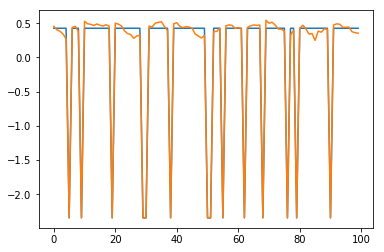

S_PU7 F_PU8 0.1632821031671759
S_PU7 S_PU8 0.16525984413577288
S_PU7 F_PU10 0.21660254464964815
S_PU7 S_PU10 0.21801954564880252
S_PU7 F_PU11 0.009095597971052192
S_PU7 S_PU11 0.009117811098797692
S_PU7 F_V2 -0.0030787452949197144
S_PU7 S_V2 -0.10417379032672269
S_PU7 P_J280 0.050025760111622054
S_PU7 P_J269 -0.10919792865181212
S_PU7 P_J300 -0.5114975971845304
S_PU7 P_J256 0.14981148144692208
S_PU7 P_J289 -0.5160278819035531
S_PU7 P_J415 0.9607072032273579


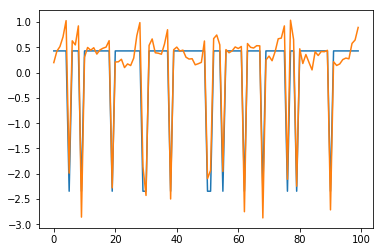

S_PU7 P_J302 -0.23658497364752176
S_PU7 P_J306 0.13171711636341826
S_PU7 P_J307 -0.2375540483892763
S_PU7 P_J317 0.08957350483567987
S_PU7 P_J14 -0.10790036493369119
S_PU7 P_J422 -0.4774761759721601
F_PU8 L_T1 0.00683221593768136
F_PU8 L_T2 0.024893976267424296
F_PU8 L_T3 -0.39125619262792743
F_PU8 L_T4 -0.12398923006505184
F_PU8 L_T5 -0.05188862171071247
F_PU8 L_T6 0.11854130263659018
F_PU8 L_T7 -0.11066791956677573
F_PU8 F_PU1 0.09801503030875858
F_PU8 F_PU2 -0.0345228067754919
F_PU8 S_PU2 -0.04373603476332683
F_PU8 F_PU4 0.133438736306221
F_PU8 S_PU4 0.1284836302324787
F_PU8 F_PU6 0.02386014088963366
F_PU8 S_PU6 0.023792595249203317
F_PU8 F_PU7 0.16896458589728455
F_PU8 S_PU7 0.1632821031671759
F_PU8 S_PU8 0.9991411523597373


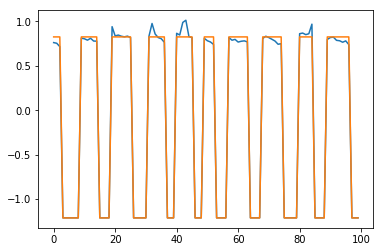

F_PU8 F_PU10 0.13530562981698596
F_PU8 S_PU10 0.1792283269438417
F_PU8 F_PU11 0.004658598337911648
F_PU8 S_PU11 0.0042425796120777355
F_PU8 F_V2 -0.1564609476428904
F_PU8 S_V2 -0.11248685439535402
F_PU8 P_J280 0.010862467921199524
F_PU8 P_J269 -0.09735887666631278
F_PU8 P_J300 -0.17343144471992533
F_PU8 P_J256 0.023474810585901035
F_PU8 P_J289 -0.17308401416468333
F_PU8 P_J415 0.08142304207608107
F_PU8 P_J302 -0.806642334168848
F_PU8 P_J306 0.9904838309260352


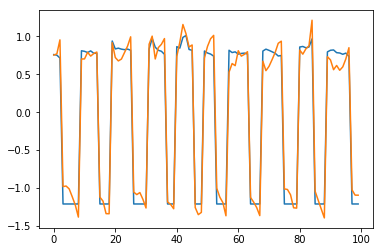

F_PU8 P_J307 -0.8035963027831694
F_PU8 P_J317 -0.04936590731186158
F_PU8 P_J14 0.00704387406524563
F_PU8 P_J422 -0.172660375440037
S_PU8 L_T1 -0.009138629611275626
S_PU8 L_T2 0.01962736384374239
S_PU8 L_T3 -0.38937611719494
S_PU8 L_T4 -0.12461246624563875
S_PU8 L_T5 -0.0420721482702119
S_PU8 L_T6 0.1258433186542768
S_PU8 L_T7 -0.11741400692103762
S_PU8 F_PU1 0.10758156473136242
S_PU8 F_PU2 -0.03824873975114101
S_PU8 S_PU2 -0.04822510676592386
S_PU8 F_PU4 0.1418004480650514
S_PU8 S_PU4 0.13662249073418803
S_PU8 F_PU6 0.02446447601510699
S_PU8 S_PU6 0.024404916005923323
S_PU8 F_PU7 0.17101924709081992
S_PU8 S_PU7 0.16525984413577288
S_PU8 F_PU8 0.9991411523597373


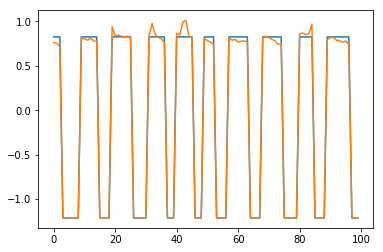

S_PU8 F_PU10 0.15327381496272668
S_PU8 S_PU10 0.19826736605411988
S_PU8 F_PU11 0.007213513165100248
S_PU8 S_PU11 0.006752065936823452
S_PU8 F_V2 -0.1436383561065236
S_PU8 S_V2 -0.09746173999147052
S_PU8 P_J280 0.012463771777734728
S_PU8 P_J269 -0.10689611090667826
S_PU8 P_J300 -0.17199925376736885
S_PU8 P_J256 0.03264967416862202
S_PU8 P_J289 -0.17149184088276903
S_PU8 P_J415 0.08416684477152649
S_PU8 P_J302 -0.8237641245152288
S_PU8 P_J306 0.9894258484203357


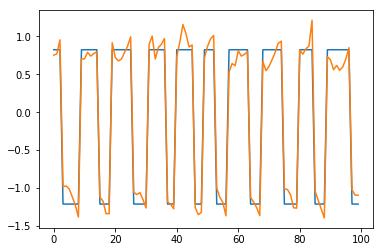

S_PU8 P_J307 -0.8208046863263819
S_PU8 P_J317 -0.03133031294526992
S_PU8 P_J14 -0.010107396222652876
S_PU8 P_J422 -0.17001112598436716
F_PU10 L_T1 0.023854980248088607
F_PU10 L_T2 -0.05465644300489676
F_PU10 L_T3 -0.2878152566931003
F_PU10 L_T4 -0.10642943170071273
F_PU10 L_T5 -0.0035324363429021246
F_PU10 L_T6 0.31102461062898723
F_PU10 L_T7 -0.2613480571078583
F_PU10 F_PU1 0.11984220591745672
F_PU10 F_PU2 -0.06010411388905759
F_PU10 S_PU2 -0.06989125265005566
F_PU10 F_PU4 0.22297421493716357
F_PU10 S_PU4 0.22086940665819146
F_PU10 F_PU6 0.019687010584403968
F_PU10 S_PU6 0.019682105413043934
F_PU10 F_PU7 0.21870247455513767
F_PU10 S_PU7 0.21660254464964815
F_PU10 F_PU8 0.13530562981698596
F_PU10 S_PU8 0.15327381496272668
F_PU10 S_PU10 0.9969027215946914


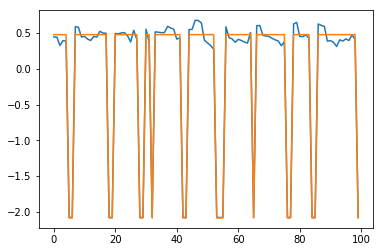

F_PU10 F_PU11 -0.004480986843377012
F_PU10 S_PU11 -0.004686029317335693
F_PU10 F_V2 -0.10169902215486551
F_PU10 S_V2 -0.08110633079915618
F_PU10 P_J280 0.03629880778170724
F_PU10 P_J269 -0.11892810202504163
F_PU10 P_J300 -0.24700832065614228
F_PU10 P_J256 0.1185108946866208
F_PU10 P_J289 -0.2458156557869062
F_PU10 P_J415 0.12700026510241025
F_PU10 P_J302 -0.5330364295301155
F_PU10 P_J306 0.08168711650418971
F_PU10 P_J307 -0.540345008037844
F_PU10 P_J317 0.8477355048749364


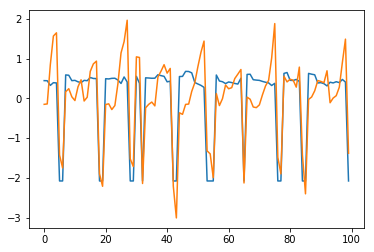

F_PU10 P_J14 -0.0354085147177656
F_PU10 P_J422 -0.23743965496739808
S_PU10 L_T1 -0.002559451987218083
S_PU10 L_T2 -0.060313374640400874
S_PU10 L_T3 -0.28459351950180883
S_PU10 L_T4 -0.10572572409927823
S_PU10 L_T5 -0.0005437206741528224
S_PU10 L_T6 0.33810330474138395
S_PU10 L_T7 -0.2390238605537386
S_PU10 F_PU1 0.13066321888268842
S_PU10 F_PU2 -0.060920617191295316
S_PU10 S_PU2 -0.07208689312452098
S_PU10 F_PU4 0.23330968328783977
S_PU10 S_PU4 0.2311253198959072
S_PU10 F_PU6 0.02050957081079175
S_PU10 S_PU6 0.020511884432738145
S_PU10 F_PU7 0.22019020384607535
S_PU10 S_PU7 0.21801954564880252
S_PU10 F_PU8 0.1792283269438417
S_PU10 S_PU8 0.19826736605411988
S_PU10 F_PU10 0.9969027215946914


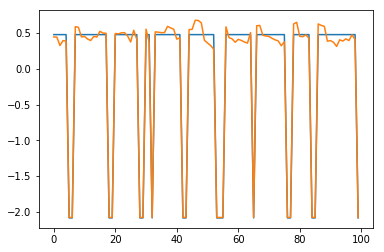

S_PU10 F_PU11 0.010223944025994509
S_PU10 S_PU11 0.010248912782906931
S_PU10 F_V2 -0.08281809231875871
S_PU10 S_V2 -0.059070503752988175
S_PU10 P_J280 0.03354856664302666
S_PU10 P_J269 -0.1296465768821192
S_PU10 P_J300 -0.24236926260649652
S_PU10 P_J256 0.13170656193629376
S_PU10 P_J289 -0.2409548640363571
S_PU10 P_J415 0.1305024022632809
S_PU10 P_J302 -0.5776484256898017
S_PU10 P_J306 0.1270683423037071
S_PU10 P_J307 -0.5846635160867936
S_PU10 P_J317 0.8618425210153542


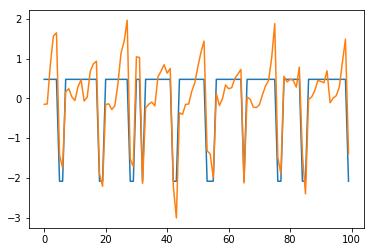

S_PU10 P_J14 -0.06186823933391543
S_PU10 P_J422 -0.23116003923342257
F_PU11 L_T1 -0.033237606022734956
F_PU11 L_T2 -0.01546511455022371
F_PU11 L_T3 -0.004500001739606682
F_PU11 L_T4 -0.007805937243448999
F_PU11 L_T5 0.01601236904748043
F_PU11 L_T6 -0.006246804911726595
F_PU11 L_T7 -0.036240223873348194
F_PU11 F_PU1 -0.00618668385853302
F_PU11 F_PU2 0.014419039734144604
F_PU11 S_PU2 0.012945686166258028
F_PU11 F_PU4 0.02389618488988224
F_PU11 S_PU4 0.024929220701608964
F_PU11 F_PU6 -0.0009118514275670588
F_PU11 S_PU6 -0.0009119542907373393
F_PU11 F_PU7 0.008397517276644787
F_PU11 S_PU7 0.009095597971052192
F_PU11 F_PU8 0.004658598337911648
F_PU11 S_PU8 0.007213513165100248
F_PU11 F_PU10 -0.004480986843377012
F_PU11 S_PU10 0.010223944025994509
F_PU11 S_PU11 0.9975637653045449


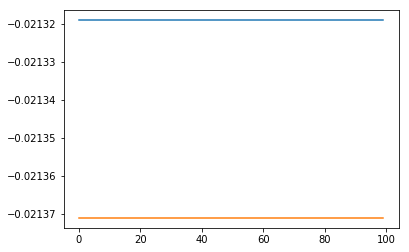

F_PU11 F_V2 0.016607915703172403
F_PU11 S_V2 0.012994494869399846
F_PU11 P_J280 -0.017370515282355982
F_PU11 P_J269 0.006408814635432869
F_PU11 P_J300 -0.00856973749543189
F_PU11 P_J256 0.02923310916826682
F_PU11 P_J289 -0.008241520835548492
F_PU11 P_J415 0.010614406631440388
F_PU11 P_J302 -0.03243770218648762
F_PU11 P_J306 0.006414688343747415
F_PU11 P_J307 -0.03292950768032737
F_PU11 P_J317 0.07718999255645098
F_PU11 P_J14 -0.02092587793872086
F_PU11 P_J422 -0.0060281834331243345
S_PU11 L_T1 -0.03339735251058103
S_PU11 L_T2 -0.015520991516617027
S_PU11 L_T3 -0.003959416814304453
S_PU11 L_T4 -0.007163958289306581
S_PU11 L_T5 0.016260882377503803
S_PU11 L_T6 -0.004847373102636052
S_PU11 L_T7 -0.03508425165783749
S_PU11 F_PU1 -0.006248432045588546
S_PU11 F_PU2 0.014443155208161067
S_PU11 S_PU2 0.012977301919447579
S_PU11 F_PU4 0.023920525755804698
S_PU11 S_PU4 0.024990102456255877
S_PU11 F_PU6 -0.0009140783369258412
S_PU11 S_PU6 -0.0009141814513069548
S_PU11 F_PU7 0.008376332595352299
S

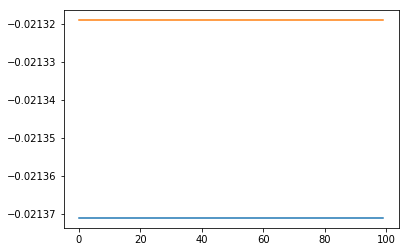

S_PU11 F_V2 0.016705714797497922
S_PU11 S_V2 0.013026229822444262
S_PU11 P_J280 -0.01737788353717869
S_PU11 P_J269 0.006469977142936836
S_PU11 P_J300 -0.008588394416521714
S_PU11 P_J256 0.029417390970244466
S_PU11 P_J289 -0.008260117089180537
S_PU11 P_J415 0.010826340459271444
S_PU11 P_J302 -0.03179367753306152
S_PU11 P_J306 0.006106608252125763
S_PU11 P_J307 -0.03228054586852236
S_PU11 P_J317 0.07892145287162419
S_PU11 P_J14 -0.020976537983781653
S_PU11 P_J422 -0.006042197075556814
F_V2 L_T1 -0.3159244226910246
F_V2 L_T2 -0.18734683991248854
F_V2 L_T3 0.36963159736125895
F_V2 L_T4 0.12018553502453014
F_V2 L_T5 0.01866191623573743
F_V2 L_T6 0.03943672548008376
F_V2 L_T7 0.06101960504042288
F_V2 F_PU1 0.11975487549981195
F_V2 F_PU2 0.10746600632161264
F_V2 S_PU2 0.0756514085154524
F_V2 F_PU4 -0.011242825678686105
F_V2 S_PU4 -0.02529814952181881
F_V2 F_PU6 0.03902117578092745
F_V2 S_PU6 0.03901120476260376
F_V2 F_PU7 0.013307214295393137
F_V2 S_PU7 -0.0030787452949197144
F_V2 F_PU8 -0.15

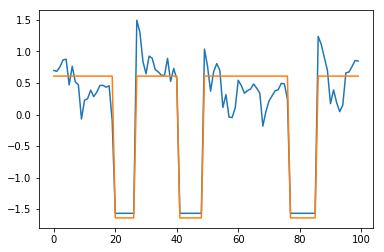

F_V2 P_J280 -0.18567139337154853
F_V2 P_J269 -0.11638555671134691
F_V2 P_J300 0.4694288709540684
F_V2 P_J256 0.09202039801192058
F_V2 P_J289 0.47279091193034145
F_V2 P_J415 0.10235564988623072
F_V2 P_J302 -0.06759510216208256
F_V2 P_J306 -0.14403010616728606
F_V2 P_J307 -0.0661015225139606
F_V2 P_J317 0.015506154093553109
F_V2 P_J14 -0.9272660136287317
F_V2 P_J422 0.5304162814086898


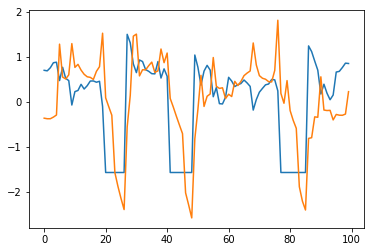

S_V2 L_T1 -0.46273609499387647
S_V2 L_T2 -0.04418907204858484
S_V2 L_T3 0.2979291407004122
S_V2 L_T4 0.13547000589533348
S_V2 L_T5 -0.0009393871015797337
S_V2 L_T6 0.026269066618659114
S_V2 L_T7 0.049402635789614555
S_V2 F_PU1 0.1857690745112925
S_V2 F_PU2 0.0668448823745991
S_V2 S_PU2 0.03228907154796064
S_V2 F_PU4 -0.07398379418852512
S_V2 S_PU4 -0.09232213644556325
S_V2 F_PU6 0.02606738769273552
S_V2 S_PU6 0.02607032827500359
S_V2 F_PU7 -0.08141646109409652
S_V2 S_PU7 -0.10417379032672269
S_V2 F_PU8 -0.11248685439535402
S_V2 S_PU8 -0.09746173999147052
S_V2 F_PU10 -0.08110633079915618
S_V2 S_PU10 -0.059070503752988175
S_V2 F_PU11 0.012994494869399846
S_V2 S_PU11 0.013026229822444262
S_V2 F_V2 0.9555233552878675


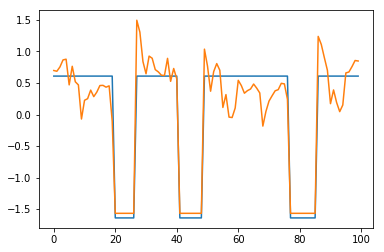

S_V2 P_J280 -0.1543514872674489
S_V2 P_J269 -0.18258398052710184
S_V2 P_J300 0.5834537173885541


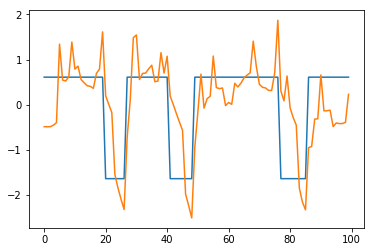

S_V2 P_J256 0.015356657601095253
S_V2 P_J289 0.587044413536711


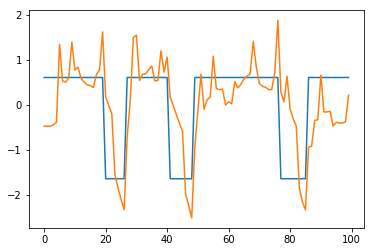

S_V2 P_J415 -0.005869890537637099
S_V2 P_J302 -0.15309847862869572
S_V2 P_J306 -0.10720953341021992
S_V2 P_J307 -0.15135352454629342
S_V2 P_J317 0.00604299010763095
S_V2 P_J14 -0.9196422712371127
S_V2 P_J422 0.6359734945990378


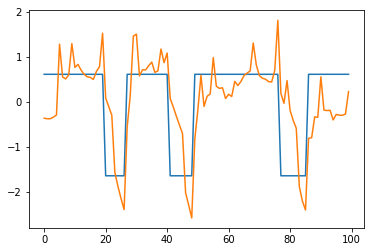

P_J280 L_T1 0.3309482332109816
P_J280 L_T2 -0.4021603260237879
P_J280 L_T3 -0.08113656951942663
P_J280 L_T4 -0.003619402965417844
P_J280 L_T5 -0.05316003387452551
P_J280 L_T6 -0.01387991498947277
P_J280 L_T7 -0.030557810126701827
P_J280 F_PU1 0.9070518622330679


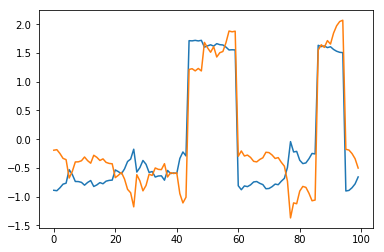

P_J280 F_PU2 -0.9933443369056989
P_J280 S_PU2 -0.9862577404195718
P_J280 F_PU4 -0.011786211898236152
P_J280 S_PU4 -0.003931020570506172
P_J280 F_PU6 -0.026932561350697413
P_J280 S_PU6 -0.026919827376232518
P_J280 F_PU7 0.038249677292355906
P_J280 S_PU7 0.050025760111622054
P_J280 F_PU8 0.010862467921199524
P_J280 S_PU8 0.012463771777734728
P_J280 F_PU10 0.03629880778170724
P_J280 S_PU10 0.03354856664302666
P_J280 F_PU11 -0.017370515282355982
P_J280 S_PU11 -0.01737788353717869
P_J280 F_V2 -0.18567139337154853
P_J280 S_V2 -0.1543514872674489
P_J280 P_J269 -0.9090545503316073
P_J280 P_J300 -0.34626516543586916
P_J280 P_J256 -0.0653109514122567
P_J280 P_J289 -0.3493393877939984
P_J280 P_J415 -0.010177413210748887
P_J280 P_J302 -0.0763984056384417
P_J280 P_J306 -0.011772302569721045
P_J280 P_J307 -0.07638781802106519
P_J280 P_J317 -0.04198381218479652
P_J280 P_J14 -0.039944985355728414
P_J280 P_J422 -0.3664757158971404
P_J269 L_T1 -0.04003576116280926
P_J269 L_T2 0.40340785092207554
P_J269 

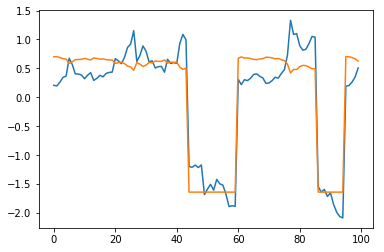

P_J269 S_PU2 0.9628774143822518


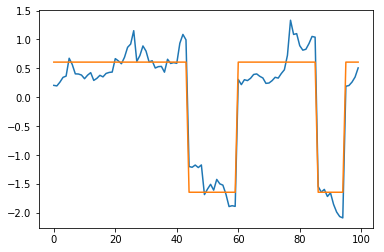

P_J269 F_PU4 -0.040809944621702274
P_J269 S_PU4 -0.039566260246364886
P_J269 F_PU6 0.008677546180295833
P_J269 S_PU6 0.008652109109870706
P_J269 F_PU7 -0.10823507080394071
P_J269 S_PU7 -0.10919792865181212
P_J269 F_PU8 -0.09735887666631278
P_J269 S_PU8 -0.10689611090667826
P_J269 F_PU10 -0.11892810202504163
P_J269 S_PU10 -0.1296465768821192
P_J269 F_PU11 0.006408814635432869
P_J269 S_PU11 0.006469977142936836
P_J269 F_V2 -0.11638555671134691
P_J269 S_V2 -0.18258398052710184
P_J269 P_J280 -0.9090545503316073
P_J269 P_J300 0.2113409615197338
P_J269 P_J256 0.02268956114620001
P_J269 P_J289 0.21269983831444197
P_J269 P_J415 -0.05287280342643881
P_J269 P_J302 0.31454453939269467
P_J269 P_J306 -0.06268035352049212
P_J269 P_J307 0.31406319457101795
P_J269 P_J317 -0.01212780745219729
P_J269 P_J14 0.3995913600471425
P_J269 P_J422 0.20894165322189237
P_J300 L_T1 -0.3331569031672189
P_J300 L_T2 0.5940743273758606


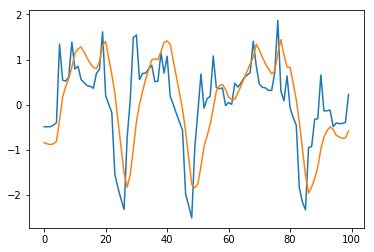

P_J300 L_T3 0.21105716956434747
P_J300 L_T4 0.2370823403022266
P_J300 L_T5 -0.15364429665142038
P_J300 L_T6 -0.21656909998697524
P_J300 L_T7 0.14749581730905
P_J300 F_PU1 -0.21007924544405562
P_J300 F_PU2 0.31757292617194965
P_J300 S_PU2 0.3058905327391375
P_J300 F_PU4 -0.5525098386053992
P_J300 S_PU4 -0.5761576105341278
P_J300 F_PU6 -0.01563877255904728
P_J300 S_PU6 -0.015690310963433617
P_J300 F_PU7 -0.47559184490845835
P_J300 S_PU7 -0.5114975971845304
P_J300 F_PU8 -0.17343144471992533
P_J300 S_PU8 -0.17199925376736885
P_J300 F_PU10 -0.24700832065614228
P_J300 S_PU10 -0.24236926260649652
P_J300 F_PU11 -0.00856973749543189
P_J300 S_PU11 -0.008588394416521714
P_J300 F_V2 0.4694288709540684
P_J300 S_V2 0.5834537173885541


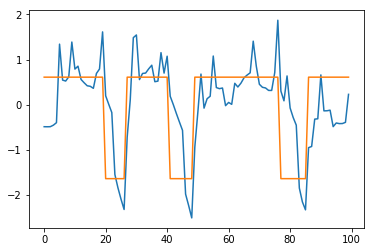

P_J300 P_J280 -0.34626516543586916
P_J300 P_J269 0.2113409615197338
P_J300 P_J256 -0.4428104398794339
P_J300 P_J289 0.9998580006335362


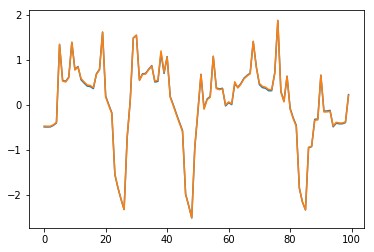

P_J300 P_J415 -0.3864183800093401
P_J300 P_J302 0.13752476721931214
P_J300 P_J306 -0.15732850687780797
P_J300 P_J307 0.13934214841191894
P_J300 P_J317 -0.1516701839082489
P_J300 P_J14 -0.3106911622867972
P_J300 P_J422 0.9957163122710355


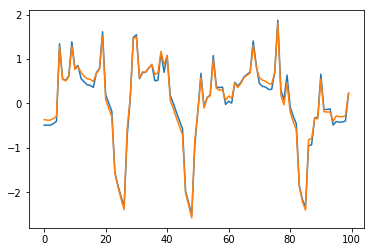

P_J256 L_T1 -0.0873067932503227
P_J256 L_T2 -0.24113300883195524
P_J256 L_T3 0.06282301333861928
P_J256 L_T4 -0.11925537107759365
P_J256 L_T5 0.29605795377609956
P_J256 L_T6 0.23425074058433146
P_J256 L_T7 -0.06670815589447342
P_J256 F_PU1 -0.02097567318724871
P_J256 F_PU2 0.051937638801028065
P_J256 S_PU2 0.04375054147375007
P_J256 F_PU4 0.9559029678343062


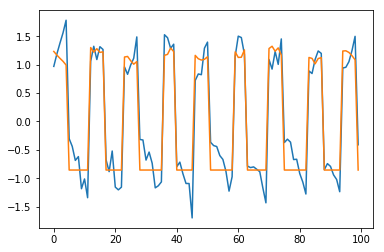

P_J256 S_PU4 0.958924376142893


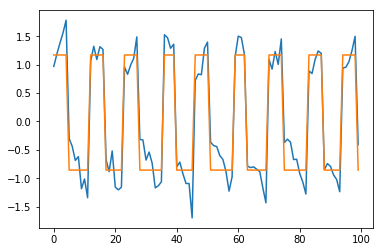

P_J256 F_PU6 -0.024707817257132156
P_J256 S_PU6 -0.024307488453966207
P_J256 F_PU7 0.1277945929696712
P_J256 S_PU7 0.14981148144692208
P_J256 F_PU8 0.023474810585901035
P_J256 S_PU8 0.03264967416862202
P_J256 F_PU10 0.1185108946866208
P_J256 S_PU10 0.13170656193629376
P_J256 F_PU11 0.02923310916826682
P_J256 S_PU11 0.029417390970244466
P_J256 F_V2 0.09202039801192058
P_J256 S_V2 0.015356657601095253
P_J256 P_J280 -0.0653109514122567
P_J256 P_J269 0.02268956114620001
P_J256 P_J300 -0.4428104398794339
P_J256 P_J289 -0.4287488877163344
P_J256 P_J415 0.12930718752227063
P_J256 P_J302 -0.0873830258265252
P_J256 P_J306 0.050460346180828335
P_J256 P_J307 -0.08804052202615863
P_J256 P_J317 0.20586955694410206
P_J256 P_J14 -0.12380446452548832
P_J256 P_J422 -0.3778432367298102
P_J289 L_T1 -0.33678463613525744
P_J289 L_T2 0.5947713172315869


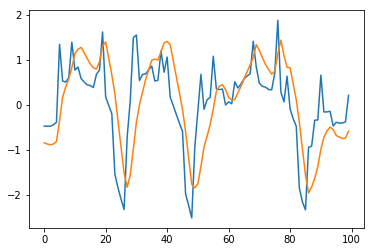

P_J289 L_T3 0.21091509173678444
P_J289 L_T4 0.23657050844567648
P_J289 L_T5 -0.14985259457269443
P_J289 L_T6 -0.21379084125828554
P_J289 L_T7 0.14668809850920841
P_J289 F_PU1 -0.21140107195812471
P_J289 F_PU2 0.3201982749110326
P_J289 S_PU2 0.30828935526018003
P_J289 F_PU4 -0.5389197626881156
P_J289 S_PU4 -0.5628094970877382
P_J289 F_PU6 -0.016804793049146647
P_J289 S_PU6 -0.016849194327681373
P_J289 F_PU7 -0.48017052412018063
P_J289 S_PU7 -0.5160278819035531
P_J289 F_PU8 -0.17308401416468333
P_J289 S_PU8 -0.17149184088276903
P_J289 F_PU10 -0.2458156557869062
P_J289 S_PU10 -0.2409548640363571
P_J289 F_PU11 -0.008241520835548492
P_J289 S_PU11 -0.008260117089180537
P_J289 F_V2 0.47279091193034145
P_J289 S_V2 0.587044413536711


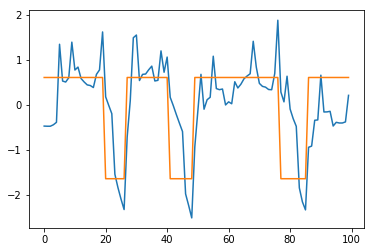

P_J289 P_J280 -0.3493393877939984
P_J289 P_J269 0.21269983831444197
P_J289 P_J300 0.9998580006335362


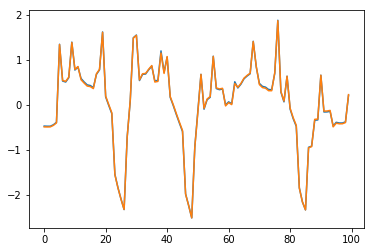

P_J289 P_J256 -0.4287488877163344
P_J289 P_J415 -0.3912705911051735
P_J289 P_J302 0.135730781832306
P_J289 P_J306 -0.1566557992497125
P_J289 P_J307 0.1375468323305471
P_J289 P_J317 -0.14947008205962908
P_J289 P_J14 -0.313936496584217
P_J289 P_J422 0.9965599265013644


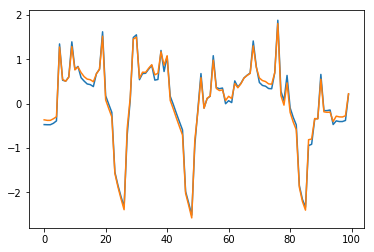

P_J415 L_T1 -0.01476825387903342
P_J415 L_T2 -0.08274667657379554
P_J415 L_T3 -0.10793629176681696
P_J415 L_T4 -0.11803402088765964
P_J415 L_T5 0.0399561887886064
P_J415 L_T6 0.09398764055798069
P_J415 L_T7 -0.08755830929042949
P_J415 F_PU1 0.05363286067701429
P_J415 F_PU2 -0.007540410609325708
P_J415 S_PU2 -0.015115379145156791
P_J415 F_PU4 0.17024296276828838
P_J415 S_PU4 0.17268029668822693
P_J415 F_PU6 0.1259658066303126
P_J415 S_PU6 0.12602094290878324
P_J415 F_PU7 0.9540431021378145


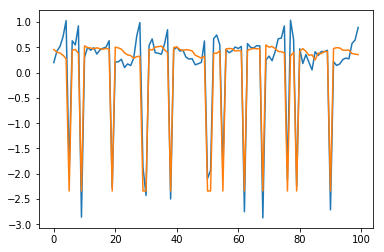

P_J415 S_PU7 0.9607072032273579


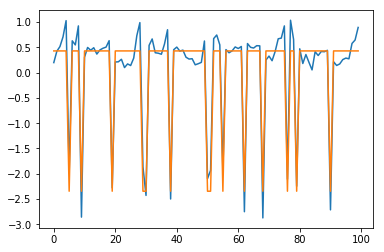

P_J415 F_PU8 0.08142304207608107
P_J415 S_PU8 0.08416684477152649
P_J415 F_PU10 0.12700026510241025
P_J415 S_PU10 0.1305024022632809
P_J415 F_PU11 0.010614406631440388
P_J415 S_PU11 0.010826340459271444
P_J415 F_V2 0.10235564988623072
P_J415 S_V2 -0.005869890537637099
P_J415 P_J280 -0.010177413210748887
P_J415 P_J269 -0.05287280342643881
P_J415 P_J300 -0.3864183800093401
P_J415 P_J256 0.12930718752227063
P_J415 P_J289 -0.3912705911051735
P_J415 P_J302 -0.1454551534296037
P_J415 P_J306 0.06800838746685443
P_J415 P_J307 -0.14597184003444427
P_J415 P_J317 0.07456819523457238
P_J415 P_J14 -0.16655403142540254
P_J415 P_J422 -0.3498218773368747
P_J302 L_T1 0.2621317280532651
P_J302 L_T2 0.04407629295636118
P_J302 L_T3 0.4083017710228078
P_J302 L_T4 0.13438213928374268
P_J302 L_T5 0.023950873369307128
P_J302 L_T6 -0.2573396339182207
P_J302 L_T7 0.22588427771306052
P_J302 F_PU1 -0.3163365709515868
P_J302 F_PU2 0.14205725690328844
P_J302 S_PU2 0.16722208546499925
P_J302 F_PU4 -0.215065912873225

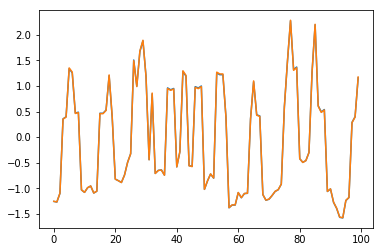

P_J302 P_J317 -0.31266524659485473
P_J302 P_J14 0.31154432476984806
P_J302 P_J422 0.11860795635136699
P_J306 L_T1 0.002898858481734127
P_J306 L_T2 0.021410318452113112
P_J306 L_T3 -0.32848673403033185
P_J306 L_T4 -0.10649547664434839
P_J306 L_T5 0.022030057489185535
P_J306 L_T6 0.10090680578000548
P_J306 L_T7 -0.08462609717063849
P_J306 F_PU1 0.063369143057118
P_J306 F_PU2 -0.00835268514442107
P_J306 S_PU2 -0.016445730163197062
P_J306 F_PU4 0.13542477776676543
P_J306 S_PU4 0.1321876821841154
P_J306 F_PU6 0.021169472396138967
P_J306 S_PU6 0.02113329702981582
P_J306 F_PU7 0.13478433669312656
P_J306 S_PU7 0.13171711636341826
P_J306 F_PU8 0.9904838309260352


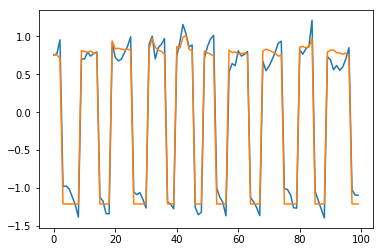

P_J306 S_PU8 0.9894258484203357


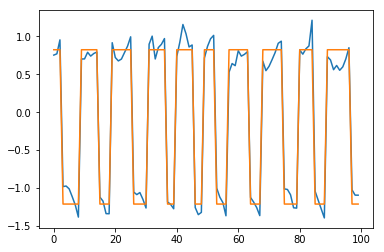

P_J306 F_PU10 0.08168711650418971
P_J306 S_PU10 0.1270683423037071
P_J306 F_PU11 0.006414688343747415
P_J306 S_PU11 0.006106608252125763
P_J306 F_V2 -0.14403010616728606
P_J306 S_V2 -0.10720953341021992
P_J306 P_J280 -0.011772302569721045
P_J306 P_J269 -0.06268035352049212
P_J306 P_J300 -0.15732850687780797
P_J306 P_J256 0.050460346180828335
P_J306 P_J289 -0.1566557992497125
P_J306 P_J415 0.06800838746685443
P_J306 P_J302 -0.7634029635219733
P_J306 P_J307 -0.7600288189255491
P_J306 P_J317 -0.06328318852226285
P_J306 P_J14 0.014722145260772517
P_J306 P_J422 -0.15619498559509815
P_J307 L_T1 0.2603932877125424
P_J307 L_T2 0.04436690857617801
P_J307 L_T3 0.4091556964039769
P_J307 L_T4 0.13478158706166096
P_J307 L_T5 0.0238776980372682
P_J307 L_T6 -0.2589154421144267
P_J307 L_T7 0.2275737870556349
P_J307 F_PU1 -0.31585468332391714
P_J307 F_PU2 0.14192823861660436
P_J307 S_PU2 0.1670544338177365
P_J307 F_PU4 -0.2161442176567773
P_J307 S_PU4 -0.20507019648085748
P_J307 F_PU6 -0.03399981829841

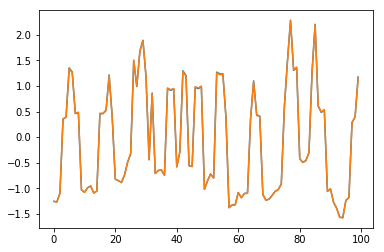

P_J307 P_J306 -0.7600288189255491
P_J307 P_J317 -0.31948187552485974
P_J307 P_J14 0.31013713805313825
P_J307 P_J422 0.12043622678609936
P_J317 L_T1 -0.027886340036664615
P_J317 L_T2 -0.09707602806841266
P_J317 L_T3 0.00910348330037639
P_J317 L_T4 -0.014372500918339555
P_J317 L_T5 0.05548485265671765
P_J317 L_T6 0.4629595475271505
P_J317 L_T7 0.06618768209376273
P_J317 F_PU1 0.013232926045188305
P_J317 F_PU2 0.026896728186002822
P_J317 S_PU2 0.019664193465923317
P_J317 F_PU4 0.20381389194049443
P_J317 S_PU4 0.20920176908000407
P_J317 F_PU6 0.005601030847116436
P_J317 S_PU6 0.005681661133702634
P_J317 F_PU7 0.08265225433441861
P_J317 S_PU7 0.08957350483567987
P_J317 F_PU8 -0.04936590731186158
P_J317 S_PU8 -0.03133031294526992
P_J317 F_PU10 0.8477355048749364


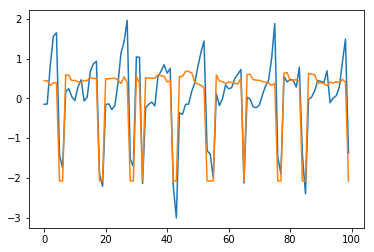

P_J317 S_PU10 0.8618425210153542


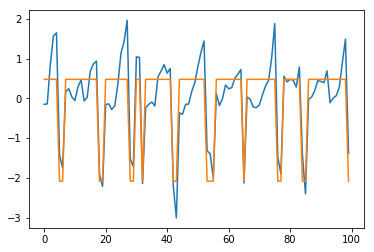

P_J317 F_PU11 0.07718999255645098
P_J317 S_PU11 0.07892145287162419
P_J317 F_V2 0.015506154093553109
P_J317 S_V2 0.00604299010763095
P_J317 P_J280 -0.04198381218479652
P_J317 P_J269 -0.01212780745219729
P_J317 P_J300 -0.1516701839082489
P_J317 P_J256 0.20586955694410206
P_J317 P_J289 -0.14947008205962908
P_J317 P_J415 0.07456819523457238
P_J317 P_J302 -0.31266524659485473
P_J317 P_J306 -0.06328318852226285
P_J317 P_J307 -0.31948187552485974
P_J317 P_J14 -0.07271306152279514
P_J317 P_J422 -0.13871532348707352
P_J14 L_T1 0.40990079418745407
P_J14 L_T2 0.27715667184876813
P_J14 L_T3 -0.2201204808009013
P_J14 L_T4 -0.06704928373116406
P_J14 L_T5 -0.024612171341663706
P_J14 L_T6 -0.12280911438987603
P_J14 L_T7 0.007289538376163071
P_J14 F_PU1 -0.4034232866224069
P_J14 F_PU2 0.13850082305827288
P_J14 S_PU2 0.1778793167436279
P_J14 F_PU4 -0.07638591162534579
P_J14 S_PU4 -0.06142244994090209
P_J14 F_PU6 -0.04133050751392944
P_J14 S_PU6 -0.04134836553206338
P_J14 F_PU7 -0.12425509708090535
P_J1

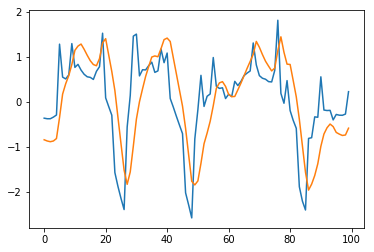

P_J422 L_T3 0.21684349979478273
P_J422 L_T4 0.22848880573636796
P_J422 L_T5 -0.1372074498140035
P_J422 L_T6 -0.19731438321863173
P_J422 L_T7 0.14032528418890702
P_J422 F_PU1 -0.20735032749813065
P_J422 F_PU2 0.33183338427581965
P_J422 S_PU2 0.3175340922514185
P_J422 F_PU4 -0.4896954326411424
P_J422 S_PU4 -0.5147196289683478
P_J422 F_PU6 -0.011061698266871945
P_J422 S_PU6 -0.011083958308509835
P_J422 F_PU7 -0.44127647246059704
P_J422 S_PU7 -0.4774761759721601
P_J422 F_PU8 -0.172660375440037
P_J422 S_PU8 -0.17001112598436716
P_J422 F_PU10 -0.23743965496739808
P_J422 S_PU10 -0.23116003923342257
P_J422 F_PU11 -0.0060281834331243345
P_J422 S_PU11 -0.006042197075556814
P_J422 F_V2 0.5304162814086898


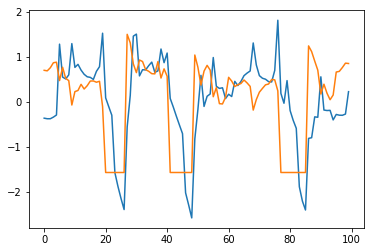

P_J422 S_V2 0.6359734945990378


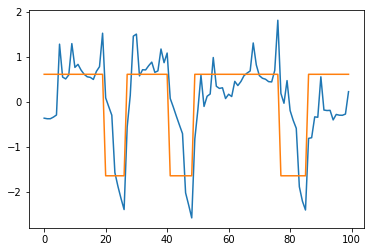

P_J422 P_J280 -0.3664757158971404
P_J422 P_J269 0.20894165322189237
P_J422 P_J300 0.9957163122710355


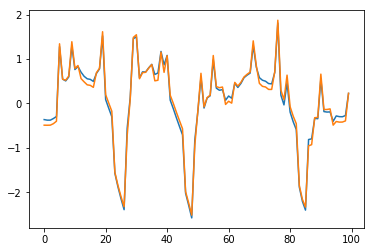

P_J422 P_J256 -0.3778432367298102
P_J422 P_J289 0.9965599265013644


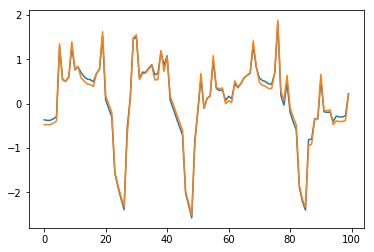

P_J422 P_J415 -0.3498218773368747
P_J422 P_J302 0.11860795635136699
P_J422 P_J306 -0.15619498559509815
P_J422 P_J307 0.12043622678609936
P_J422 P_J317 -0.13871532348707352
P_J422 P_J14 -0.37170908269382447


In [7]:
# Are the signals correlated?
for column_i in df:
    for column_j in df:
        if column_i == column_j: continue
        correlation = stats.pearsonr(df[column_i],df[column_j])[0]
        print column_i, column_j, correlation
        if correlation >= 0.5:
            plt.plot(df[column_i][:100])
            plt.plot(df[column_j][:100])
            plt.show()

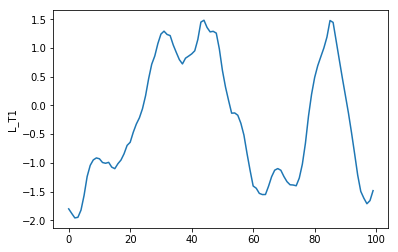

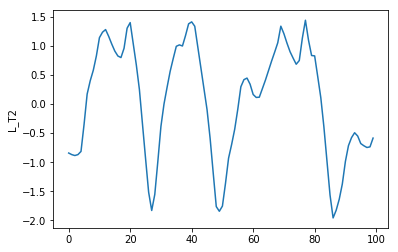

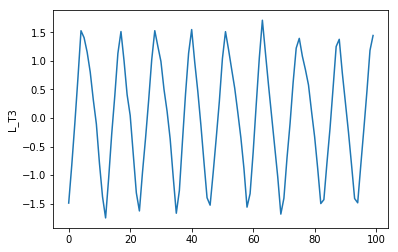

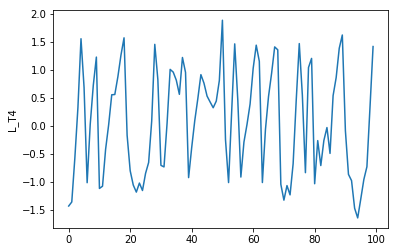

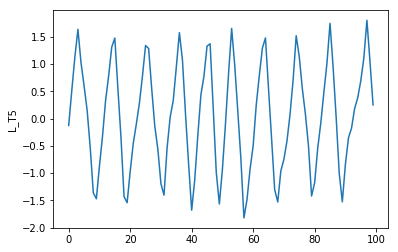

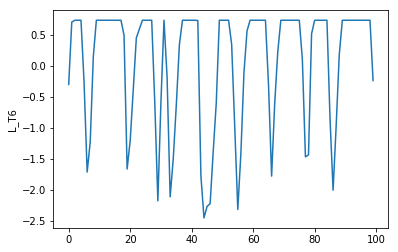

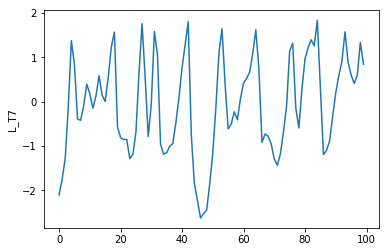

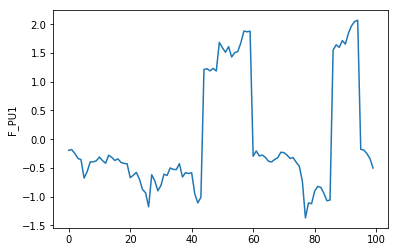

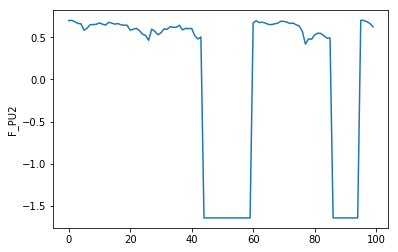

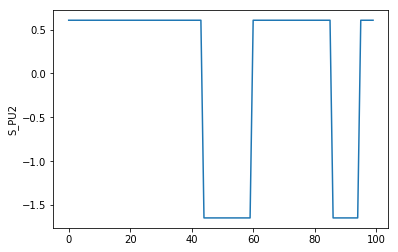

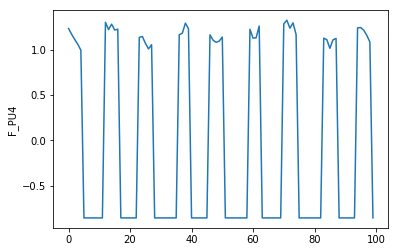

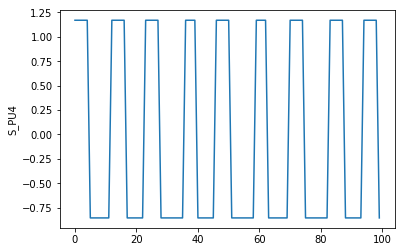

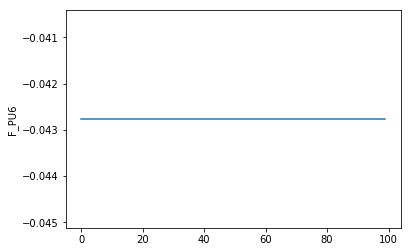

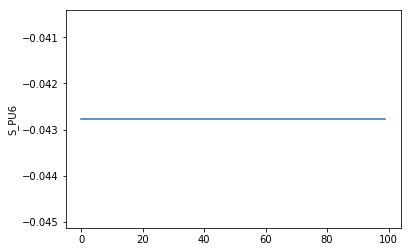

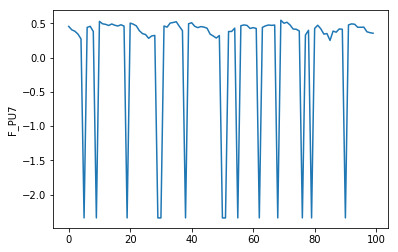

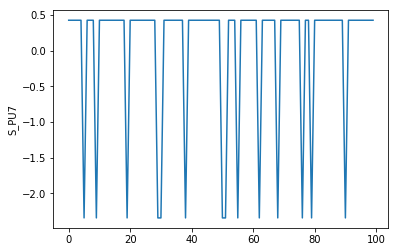

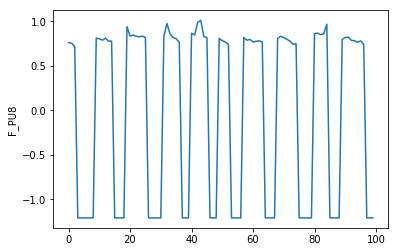

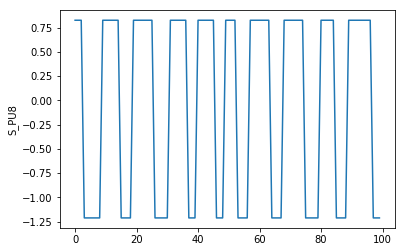

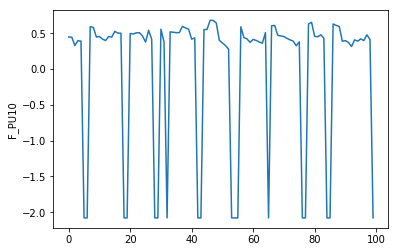

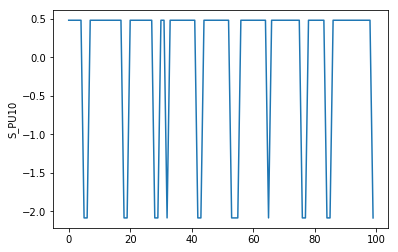

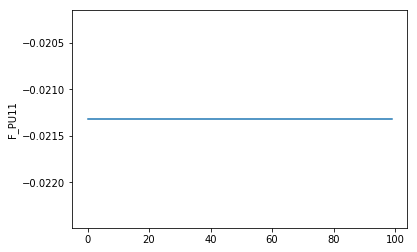

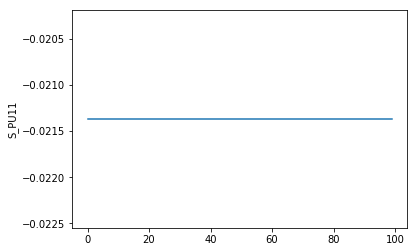

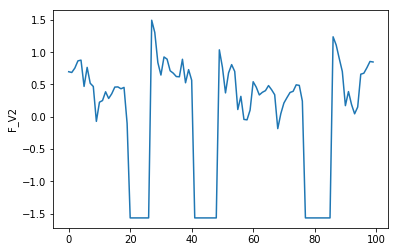

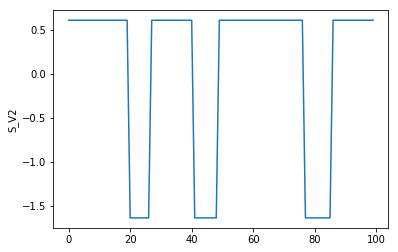

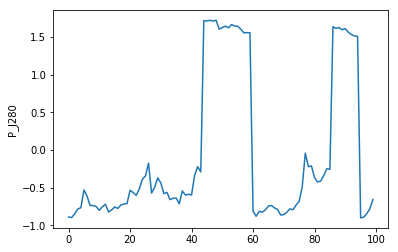

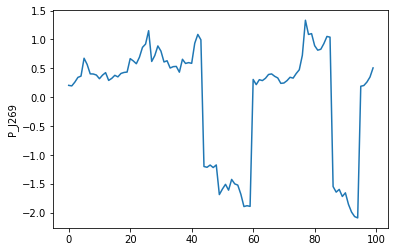

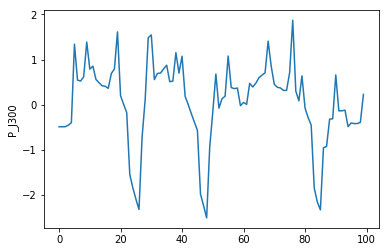

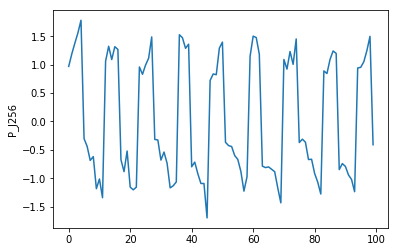

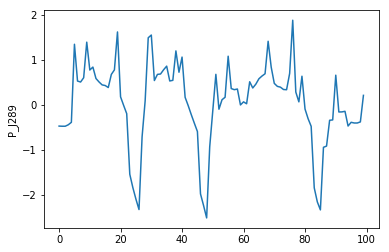

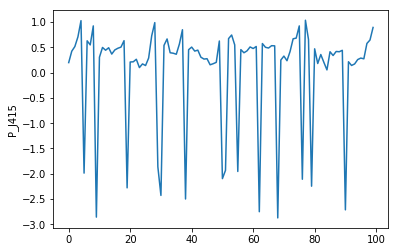

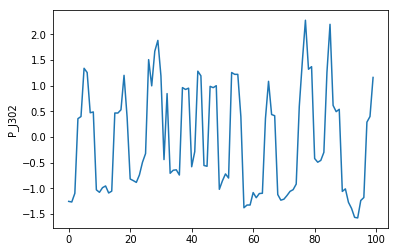

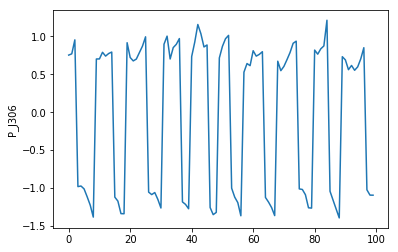

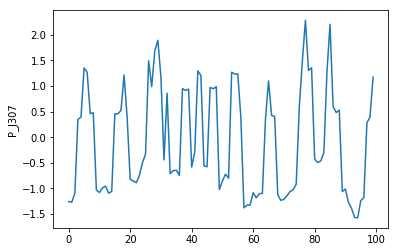

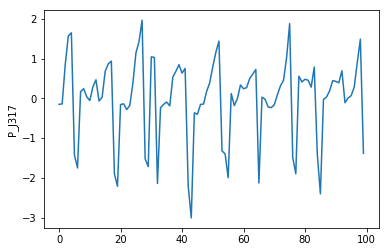

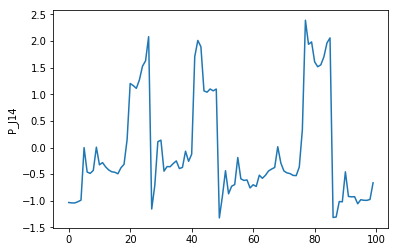

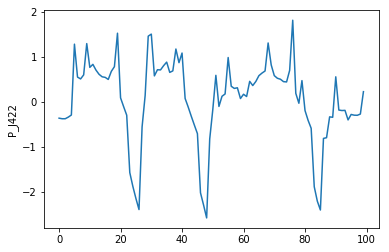

In [6]:
for column in df:
    plt.plot(df[column][:100],'-')
    plt.ylabel(column)
    plt.show()